In [1]:
# ============================================
# ADULT CENSUS INCOME PREDICTION
# Complete Code from Start to Finish
# ============================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")
sns.set_style('whitegrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# ============================================
# 2. LOAD THE DATA
# ============================================

# Method 1: Load from local file
# df = pd.read_csv('adult.csv')

# Method 2: Load directly from UCI repository (if internet connected)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)

print("✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

✅ Data loaded successfully!
Dataset shape: (32561, 15)

First 5 rows:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0             


DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

DESCRIPTIVE STATISTICS
                age        fnlwgt  education-n

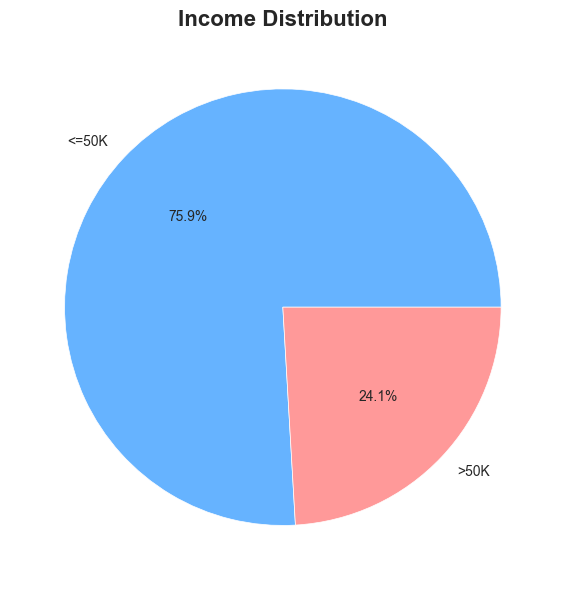

In [3]:
# ============================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

print("\n" + "="*50)
print("DATA INFORMATION")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
print(df.isnull().sum())

print("\n" + "="*50)
print("TARGET VARIABLE DISTRIBUTION")
print("="*50)
print(df['income'].value_counts())
print(f"\nPercentage:")
print(df['income'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Income Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# ============================================
# 4. DATA CLEANING
# ============================================

print("\n" + "="*50)
print("DATA CLEANING")
print("="*50)

# Check missing values before cleaning
print(f"\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values
df_clean = df.dropna()

print(f"\n✅ Dropped {len(df) - len(df_clean)} rows with missing values")
print(f"New shape: {df_clean.shape}")

# Check for duplicates
duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Dropped {duplicates} duplicate rows")
    print(f"Final shape: {df_clean.shape}")

# Check missing values after cleaning
print(f"\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# Check unique values in categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("\n" + "="*50)
print("CATEGORICAL COLUMNS UNIQUE VALUES")
print("="*50)
for col in categorical_cols:
    print(f"\n{col}: {df_clean[col].unique()}")


DATA CLEANING

Missing values before cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

✅ Dropped 0 rows with missing values
New shape: (32561, 15)
✅ Dropped 24 duplicate rows
Final shape: (32537, 15)

Missing values after cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

CATEGORICAL COLUMNS UNIQUE VALUES

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education: ['B

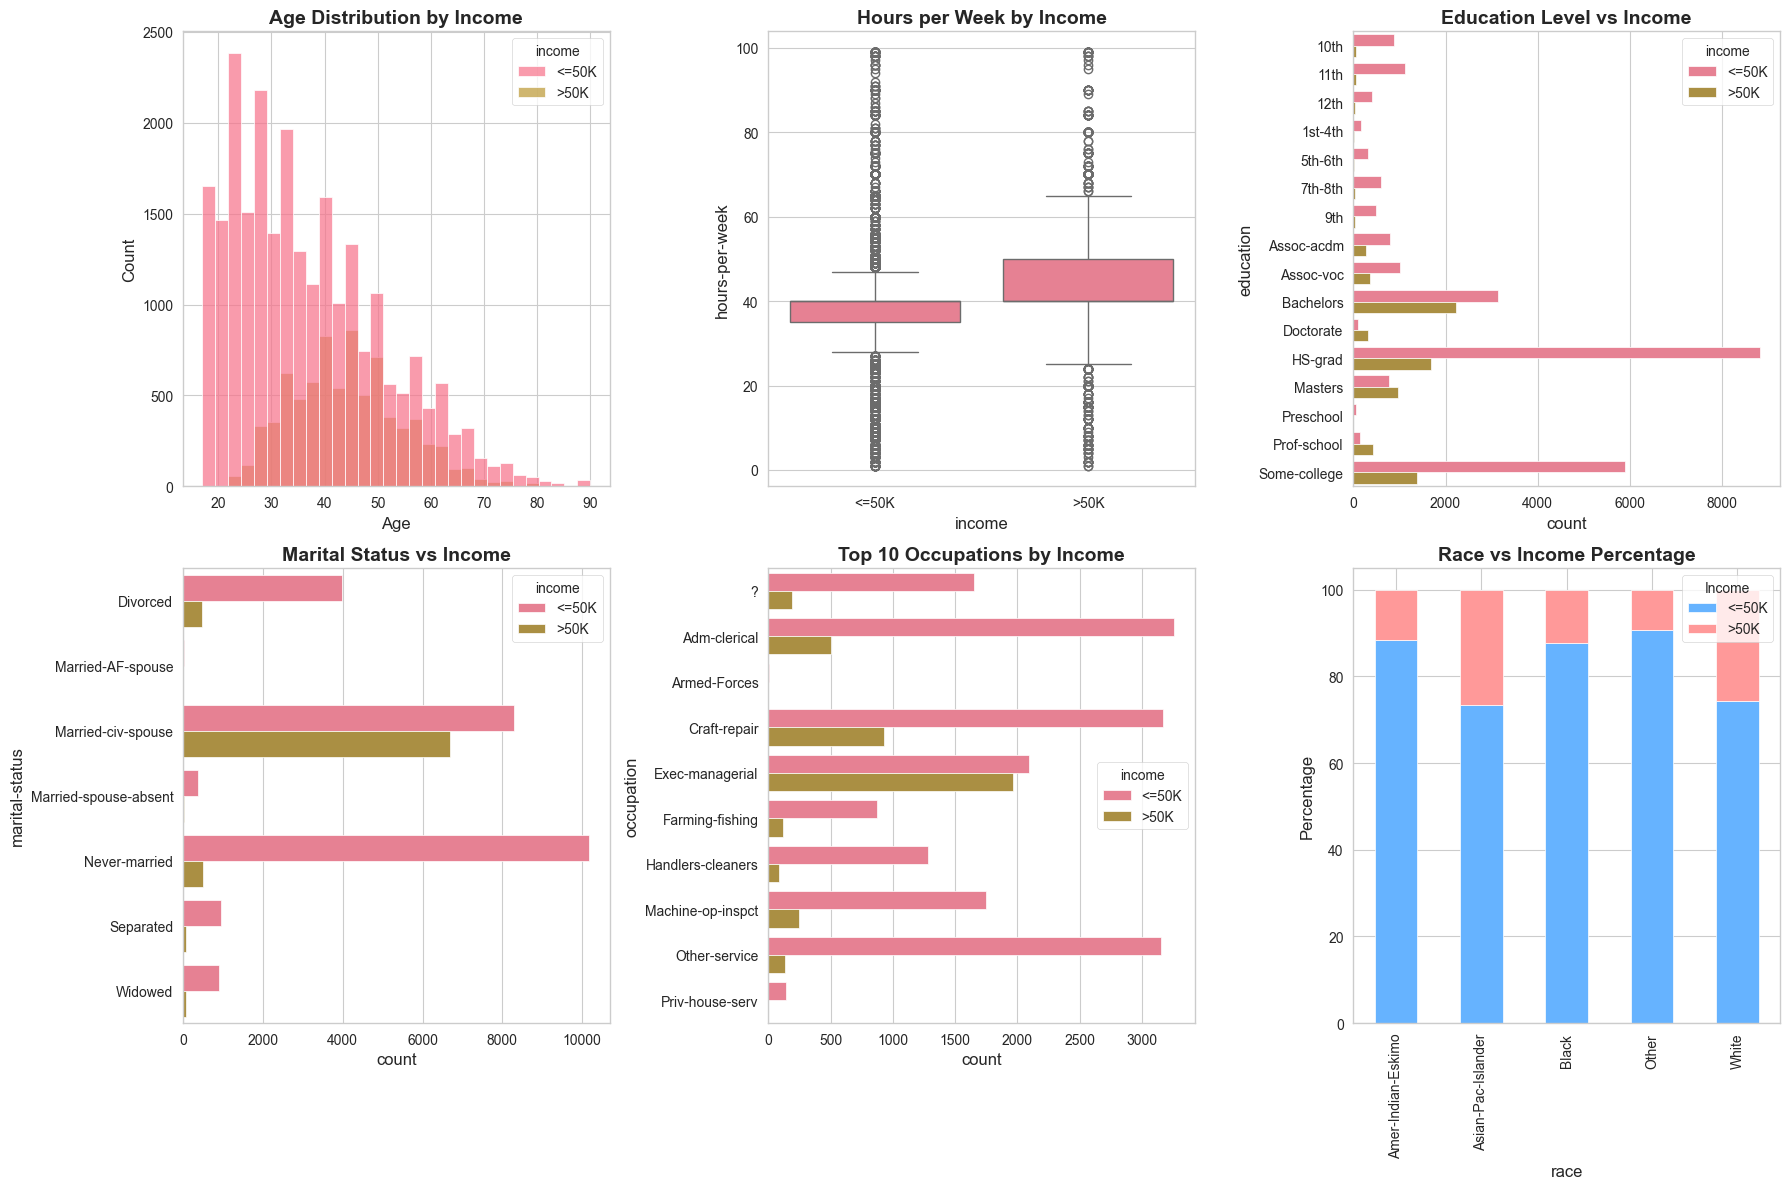

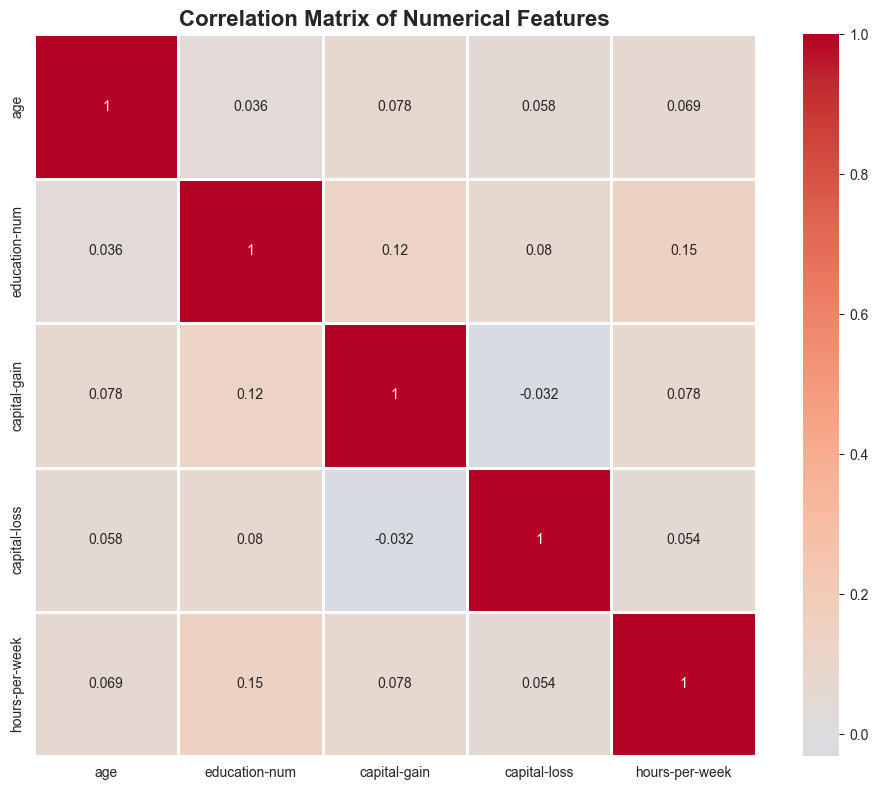

In [5]:
# ============================================
# 5. VISUALIZATIONS
# ============================================

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age distribution by income
sns.histplot(data=df_clean, x='age', hue='income', bins=30, ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title('Age Distribution by Income', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')

# 2. Hours per week distribution
sns.boxplot(data=df_clean, x='income', y='hours-per-week', ax=axes[0, 1])
axes[0, 1].set_title('Hours per Week by Income', fontsize=14, fontweight='bold')

# 3. Education vs Income
education_order = df_clean.groupby('education')['income'].apply(lambda x: (x == ' >50K').mean()).sort_values(ascending=False).index
sns.countplot(data=df_clean, y='education', hue='income', order=education_order, ax=axes[0, 2])
axes[0, 2].set_title('Education Level vs Income', fontsize=14, fontweight='bold')

# 4. Marital Status vs Income
marital_order = df_clean.groupby('marital-status')['income'].apply(lambda x: (x == ' >50K').mean()).sort_values(ascending=False).index
sns.countplot(data=df_clean, y='marital-status', hue='income', order=marital_order, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status vs Income', fontsize=14, fontweight='bold')

# 5. Occupation vs Income
occupation_order = df_clean.groupby('occupation')['income'].apply(lambda x: (x == ' >50K').mean()).sort_values(ascending=False).head(10).index
sns.countplot(data=df_clean, y='occupation', hue='income', order=occupation_order, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Occupations by Income', fontsize=14, fontweight='bold')

# 6. Race vs Income
race_income = pd.crosstab(df_clean['race'], df_clean['income'], normalize='index') * 100
race_income.plot(kind='bar', stacked=True, ax=axes[1, 2], color=['#66b3ff', '#ff9999'])
axes[1, 2].set_title('Race vs Income Percentage', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Percentage')
axes[1, 2].legend(title='Income')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional: Correlation of numerical features
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
correlation = df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# ============================================
# 6. FEATURE ENGINEERING
# ============================================

# Create a copy for feature engineering
df_encoded = df_clean.copy()

# Encode target variable (income)
df_encoded['income'] = df_encoded['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

print("\n" + "="*50)
print("TARGET ENCODING")
print("="*50)
print(df_encoded['income'].value_counts())
print(f"\nPercentage:")
print(df_encoded['income'].value_counts(normalize=True) * 100)

# Create age groups
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Create work hours categories
df_encoded['hours_category'] = pd.cut(df_encoded['hours-per-week'], bins=[0, 20, 30, 40, 50, 60, 100],
                                        labels=['Part-time', 'Reduced', 'Full-time', 'Overtime', 'Extended', 'Extreme'])

# Create capital gains/loss flags
df_encoded['has_capital_gain'] = (df_encoded['capital-gain'] > 0).astype(int)
df_encoded['has_capital_loss'] = (df_encoded['capital-loss'] > 0).astype(int)

print("\n✅ Created new features:")
print("- age_group")
print("- hours_category")
print("- has_capital_gain")
print("- has_capital_loss")


TARGET ENCODING
income
0    24698
1     7839
Name: count, dtype: int64

Percentage:
income
0    75.907428
1    24.092572
Name: proportion, dtype: float64

✅ Created new features:
- age_group
- hours_category
- has_capital_gain
- has_capital_loss


In [7]:
# ============================================
# 7. ONE-HOT ENCODING
# ============================================

# List all categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country', 
                       'age_group', 'hours_category']

print("\n" + "="*50)
print("ONE-HOT ENCODING")
print("="*50)
print(f"Categorical columns to encode: {categorical_columns}")

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

print(f"\n✅ One-hot encoding completed!")
print(f"Shape after encoding: {df_encoded.shape}")
print(f"\nFirst 5 rows of encoded data:")
print(df_encoded.head())

# Drop original columns we don't need
columns_to_drop = ['fnlwgt']  # fnlwgt is not useful for prediction
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

print(f"\n✅ Final shape: {df_encoded.shape}")
print(f"\nAll columns ({len(df_encoded.columns)} total):")
print(df_encoded.columns.tolist())


ONE-HOT ENCODING
Categorical columns to encode: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age_group', 'hours_category']

✅ One-hot encoding completed!
Shape after encoding: (32537, 113)

First 5 rows of encoded data:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  has_capital_gain  has_capital_loss  workclass_Federal-gov  ...  \
0       0                 1                 0                  False  ...   
1       0                 0                 0                  False  ...   
2       0            

In [8]:
# ============================================
# 8. PREPARE DATA FOR MODELING
# ============================================

# Separate features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

print("\n" + "="*50)
print("DATA FOR MODELING")
print("="*50)
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print(f"\nFeatures: {X.columns.tolist()[:10]}... (showing first 10)")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\n✅ Data split completed!")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTesting set distribution:")
print(y_test.value_counts(normalize=True))


DATA FOR MODELING
Features shape (X): (32537, 111)
Target shape (y): (32537,)

Features: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'has_capital_gain', 'has_capital_loss', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked']... (showing first 10)

✅ Data split completed!
Training set: (26029, 111)
Testing set: (6508, 111)

Training set distribution:
income
0    0.759076
1    0.240924
Name: proportion, dtype: float64

Testing set distribution:
income
0    0.759066
1    0.240934
Name: proportion, dtype: float64


In [9]:
# ============================================
# 9. FEATURE SCALING
# ============================================

# Identify numerical columns for scaling
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

print("\n" + "="*50)
print("FEATURE SCALING")
print("="*50)
print(f"Scaling numerical features: {numerical_features}")

# Create scaler
scaler = StandardScaler()

# Scale only numerical features (one-hot encoded columns don't need scaling)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("✅ Features scaled successfully!")
print(f"\nScaled training data stats:")
print(X_train_scaled[numerical_features].describe())


FEATURE SCALING
Scaling numerical features: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
✅ Features scaled successfully!

Scaled training data stats:
                age  education-num  capital-gain  capital-loss  hours-per-week
count  2.602900e+04   2.602900e+04  2.602900e+04  2.602900e+04    2.602900e+04
mean  -6.005586e-17  -7.766315e-17 -1.910868e-17  2.293042e-17   -4.258507e-17
std    1.000019e+00   1.000019e+00  1.000019e+00  1.000019e+00    1.000019e+00
min   -1.578817e+00  -3.540741e+00 -1.457685e-01 -2.159267e-01   -3.171838e+00
25%   -7.729031e-01  -4.229617e-01 -1.457685e-01 -2.159267e-01   -3.429830e-02
50%   -1.135186e-01  -3.323923e-02 -1.457685e-01 -2.159267e-01   -3.429830e-02
75%    6.191308e-01   7.462057e-01 -1.457685e-01 -2.159267e-01    3.679503e-01
max    3.769523e+00   2.305096e+00  1.354639e+01  1.061066e+01    4.712235e+00


In [10]:
# ============================================
# 10. TRAIN MULTIPLE MODELS
# ============================================

# Dictionary to store results
results = {}

# 1. LOGISTIC REGRESSION
print("\n" + "="*50)
print("🚀 TRAINING LOGISTIC REGRESSION")
print("="*50)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

results['Logistic Regression'] = {
    'model': lr_model,
    'accuracy': lr_accuracy,
    'predictions': lr_pred
}

print(f"✅ Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# 2. DECISION TREE
print("\n" + "="*50)
print("🌳 TRAINING DECISION TREE")
print("="*50)

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)  # Decision Tree doesn't need scaled data

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

results['Decision Tree'] = {
    'model': dt_model,
    'accuracy': dt_accuracy,
    'predictions': dt_pred
}

print(f"✅ Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

# 3. RANDOM FOREST
print("\n" + "="*50)
print("🌲 TRAINING RANDOM FOREST")
print("="*50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)  # Random Forest doesn't need scaled data

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

results['Random Forest'] = {
    'model': rf_model,
    'accuracy': rf_accuracy,
    'predictions': rf_pred
}

print(f"✅ Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# 4. EXTRA: TRY XGBOOST (if installed)
try:
    from xgboost import XGBClassifier
    
    print("\n" + "="*50)
    print("⚡ TRAINING XGBOOST")
    print("="*50)
    
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    
    xgb_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    
    results['XGBoost'] = {
        'model': xgb_model,
        'accuracy': xgb_accuracy,
        'predictions': xgb_pred
    }
    
    print(f"✅ Accuracy: {xgb_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, xgb_pred))
    
except ImportError:
    print("⚠️ XGBoost not installed. Skipping...")


🚀 TRAINING LOGISTIC REGRESSION
✅ Accuracy: 0.8637

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4940
           1       0.76      0.64      0.69      1568

    accuracy                           0.86      6508
   macro avg       0.82      0.79      0.80      6508
weighted avg       0.86      0.86      0.86      6508


🌳 TRAINING DECISION TREE
✅ Accuracy: 0.8649

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4940
           1       0.79      0.60      0.68      1568

    accuracy                           0.86      6508
   macro avg       0.84      0.77      0.80      6508
weighted avg       0.86      0.86      0.86      6508


🌲 TRAINING RANDOM FOREST
✅ Accuracy: 0.8643

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      4940
           1       0.83 


📊 MODEL COMPARISON
              Model  Accuracy
      Decision Tree  0.864935
      Random Forest  0.864321
Logistic Regression  0.863706


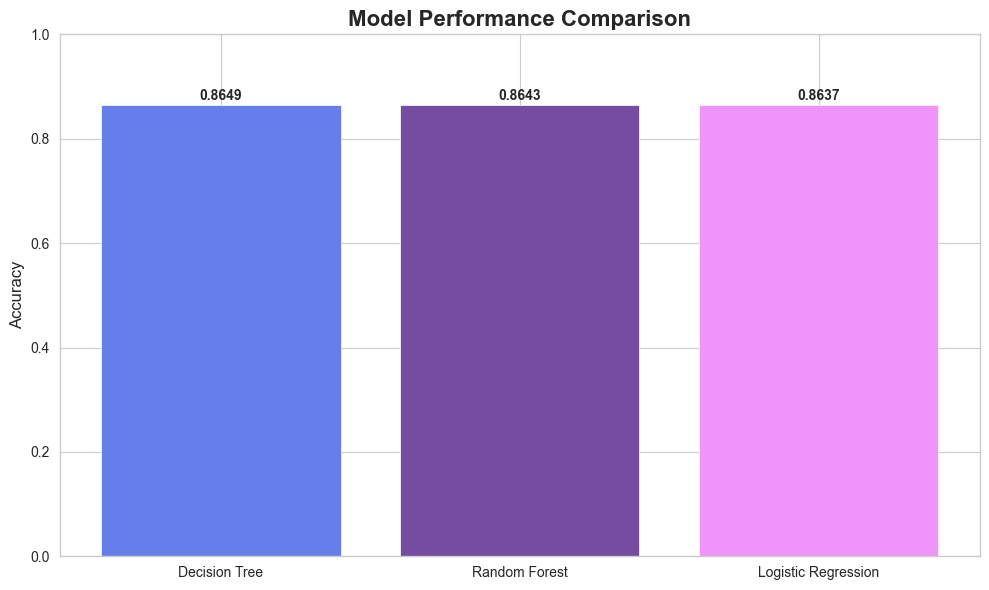


🏆 Best Model: Decision Tree with accuracy 0.8649


In [11]:
# ============================================
# 11. COMPARE MODELS
# ============================================

# Create comparison dataframe
model_names = []
accuracies = []

for name, result in results.items():
    model_names.append(name)
    accuracies.append(result['accuracy'])

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("📊 MODEL COMPARISON")
print("="*50)
print(comparison_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(10, 6))
colors = ['#667eea', '#764ba2', '#f093fb', '#ff6b6b'][:len(model_names)]
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\n🏆 Best Model: {best_model_name} with accuracy {comparison_df.iloc[0]['Accuracy']:.4f}")

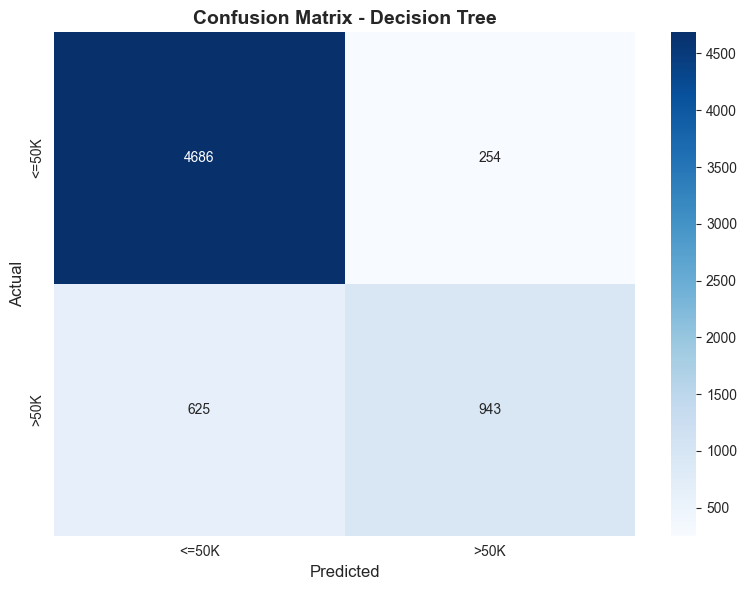


📊 DETAILED METRICS
True Negatives (correctly predicted <=50K): 4686
False Positives (incorrectly predicted >50K): 254
False Negatives (missed >50K predictions): 625
True Positives (correctly predicted >50K): 943

🎯 Precision (for >50K): 0.7878
🎯 Recall (for >50K): 0.6014
🎯 F1-Score (for >50K): 0.6821


In [12]:
# ============================================
# 12. CONFUSION MATRIX
# ============================================

# Create confusion matrix
cm = confusion_matrix(y_test, best_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate metrics
tn, fp, fn, tp = cm.ravel()

print("\n" + "="*50)
print("📊 DETAILED METRICS")
print("="*50)
print(f"True Negatives (correctly predicted <=50K): {tn}")
print(f"False Positives (incorrectly predicted >50K): {fp}")
print(f"False Negatives (missed >50K predictions): {fn}")
print(f"True Positives (correctly predicted >50K): {tp}")

# Calculate additional metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n🎯 Precision (for >50K): {precision:.4f}")
print(f"🎯 Recall (for >50K): {recall:.4f}")
print(f"🎯 F1-Score (for >50K): {f1:.4f}")


🔝 TOP 20 MOST IMPORTANT FEATURES
                          feature  importance
marital-status_Married-civ-spouse    0.164219
                     capital-gain    0.150559
                    education-num    0.108445
     marital-status_Never-married    0.068395
                              age    0.064421
                   hours-per-week    0.046997
                     capital-loss    0.040449
                 has_capital_gain    0.038854
       relationship_Not-in-family    0.029347
       occupation_Exec-managerial    0.027059
                         sex_Male    0.026221
        occupation_Prof-specialty    0.020410
           relationship_Own-child    0.020235
              education_Bachelors    0.019537
                education_Masters    0.015376
           relationship_Unmarried    0.014884
                  age_group_46-55    0.012160
                relationship_Wife    0.010948
            education_Prof-school    0.008495
          hours_category_Overtime    0.008315


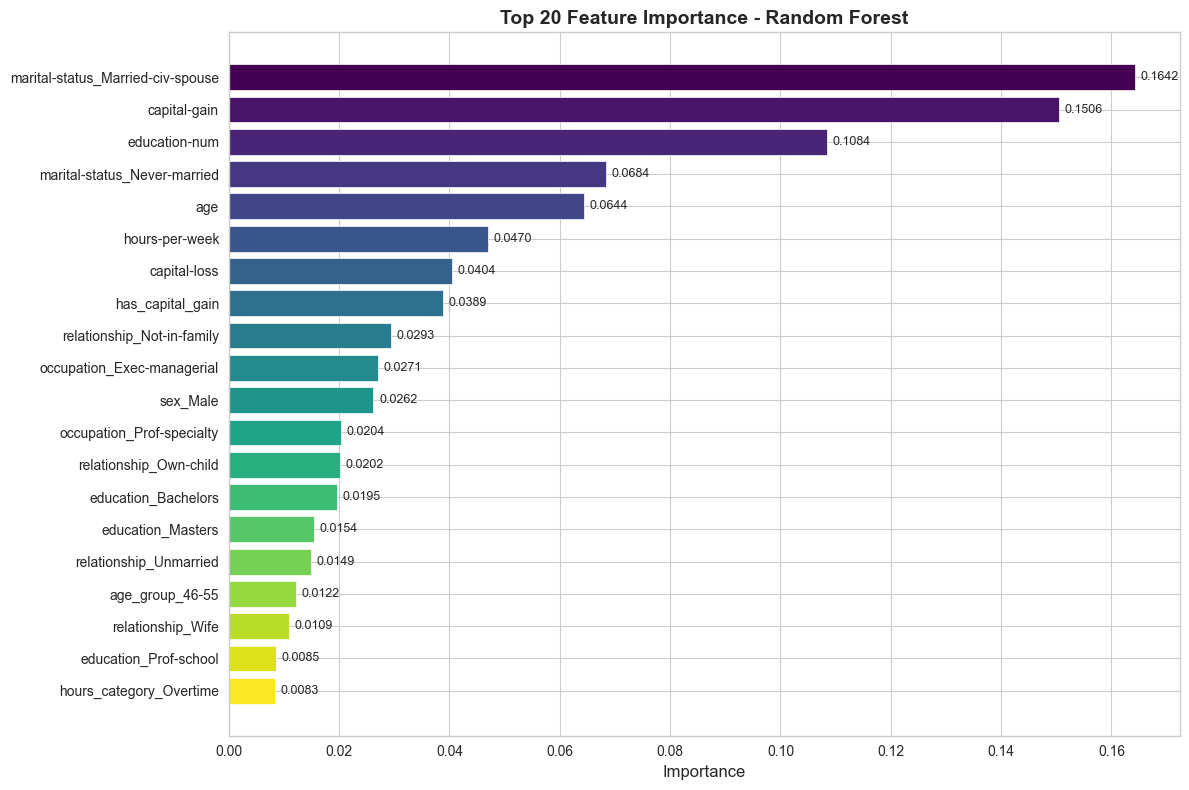

In [13]:
# ============================================
# 13. FEATURE IMPORTANCE
# ============================================

# Use Random Forest for feature importance (if it's the best or second best)
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n" + "="*50)
    print("🔝 TOP 20 MOST IMPORTANT FEATURES")
    print("="*50)
    print(feature_importance.head(20).to_string(index=False))

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    top_20 = feature_importance.head(20)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_20)))
    bars = plt.barh(top_20['feature'], top_20['importance'], color=colors)
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 20 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add importance values
    for bar, imp in zip(bars, top_20['importance']):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                 f'{imp:.4f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

In [14]:
# ============================================
# 14. SAVE MODELS FOR FUTURE USE
# ============================================

import joblib
import pickle

# Save the best model
joblib.dump(best_model, 'adult_census_best_model.pkl')
print(f"✅ Best model ({best_model_name}) saved as 'adult_census_best_model.pkl'")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

# Save feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("✅ Feature names saved as 'feature_names.pkl'")

# Save the encoder for target
target_encoder = {'<=50K': 0, '>50K': 1}
joblib.dump(target_encoder, 'target_encoder.pkl')
print("✅ Target encoder saved as 'target_encoder.pkl'")

# Save all results for later analysis
with open('model_results.pkl', 'wb') as f:
    pickle.dump(results, f)
print("✅ All results saved as 'model_results.pkl'")

✅ Best model (Decision Tree) saved as 'adult_census_best_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Feature names saved as 'feature_names.pkl'
✅ Target encoder saved as 'target_encoder.pkl'
✅ All results saved as 'model_results.pkl'


In [16]:
# ============================================
# 15. PREDICTION FUNCTION
# ============================================

def predict_income(person_data):
    """
    Predict income for a new person
    
    Parameters:
    person_data: Dictionary with person's information
    
    Returns:
    prediction: 0 (<=50K) or 1 (>50K)
    probability: Probability scores for both classes
    """
    
    # Load saved artifacts
    model = joblib.load('adult_census_best_model.pkl')
    scaler = joblib.load('scaler.pkl')
    feature_names = joblib.load('feature_names.pkl')
    
    # Create dataframe with all features (initialize with zeros)
    person_df = pd.DataFrame(columns=feature_names)
    person_df.loc[0] = 0
    
    # Fill in numerical features
    numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    for feat in numerical_features:
        if feat in person_data:
            person_df.at[0, feat] = person_data[feat]
    
    # Fill in categorical features (one-hot encoded)
    for key, value in person_data.items():
        if key not in numerical_features:
            column_name = f"{key}_{value}"
            if column_name in feature_names:
                person_df.at[0, column_name] = 1
    
    # Scale numerical features
    person_df[numerical_features] = scaler.transform(person_df[numerical_features])
    
    # Make prediction
    prediction = model.predict(person_df)[0]
    probability = model.predict_proba(person_df)[0]
    
    return prediction, probability

# Example: Test the prediction function
test_person = {
    'age': 35,
    'education-num': 13,  # Bachelor's degree
    'hours-per-week': 45,
    'capital-gain': 0,
    'capital-loss': 0,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Prof-specialty',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'native-country': 'United-States',
    'age_group': '36-45',
    'hours_category': 'Full-time',
    'has_capital_gain': 0,
    'has_capital_loss': 0
}

# Get prediction
pred, prob = predict_income(test_person)

print("\n" + "="*50)
print("🎯 TEST PREDICTION")
print("="*50)
print(f"Person: 35 years old, Male, Bachelor's degree, Professional specialty")
print(f"\nPrediction: {'>50K' if pred == 1 else '<=50K'}")
print(f"Probability: <=50K: {prob[0]:.4f}, >50K: {prob[1]:.4f}")


🎯 TEST PREDICTION
Person: 35 years old, Male, Bachelor's degree, Professional specialty

Prediction: <=50K
Probability: <=50K: 0.9778, >50K: 0.0222
